In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [69]:
#Read the dataset
df = pd.read_csv('df.csv')

In [70]:
# Display basic information about the df set
print("Basic Information:")
print(df .info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226486 entries, 0 to 226485
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      226486 non-null  int64  
 1   date            226486 non-null  object 
 2   category_id     226486 non-null  int64  
 3   sku_id          226486 non-null  int64  
 4   sales_price     226486 non-null  float64
 5   sales_quantity  226486 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 10.4+ MB
None


In [71]:
# Display the first few rows of the dataset
print("\nFirst few rows:")
print(df.head())


First few rows:
   Unnamed: 0        date  category_id  sku_id  sales_price  sales_quantity
0       78161  2016-11-25            7    1108       457.60             1.0
1       81079  2016-11-18            7    2999       470.60             1.0
2       81177  2016-11-18            7    1428       717.60             1.0
3       81292  2016-11-18            7    3923       383.50             1.0
4       81416  2016-11-18           17    8075        18.85             2.0


In [72]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0        0
date              0
category_id       0
sku_id            0
sales_price       0
sales_quantity    0
dtype: int64


* Remove the Unnamed: 0 column because it is not needed.

In [73]:
#Deleting column 'Unnamed' - this data is not nessesary
df = df.drop(columns=['Unnamed: 0'])

df

,date,category_id,sku_id,sales_price,sales_quantity
0,2016-11-25,7,1108,457.60,1.0
1,2016-11-18,7,2999,470.60,1.0
2,2016-11-18,7,1428,717.60,1.0
3,2016-11-18,7,3923,383.50,1.0
4,2016-11-18,17,8075,18.85,2.0
...,...,...,...,...,...
226481,2020-10-14,7,21442,570.70,1.0
226482,2020-10-14,7,502340,505.70,3.0
226483,2020-10-14,7,723588,401.70,3.0
226484,2020-10-17,7,792124,778.70,1.0


In [74]:
df.describe()
#we don't have negative values in sales_price and sales_quantity columns

,category_id,sku_id,sales_price,sales_quantity
count,226486.000000,226486.000000,226486.000000,226486.000000
mean,15.069594,497813.898607,109.033102,16.078857
std,4.625731,242446.818578,151.500911,184.248121
min,7.000000,1045.000000,1.027000,1.000000
25%,17.000000,398064.000000,38.220000,1.000000
50%,17.000000,550996.000000,51.350000,3.000000
75%,17.000000,702116.000000,71.500000,5.000000
max,23.000000,838924.000000,2923.700000,8069.000000


In [75]:
#check if the category_id is balanced
category_id_counts = df['category_id'].value_counts()
category_id_counts

category_id
17    160797
7      51959
23     13730
Name: count, dtype: int64

* Let's convert the date column to a date format.

In [76]:
#Transforming column 'date' on datetime format
df['date'] = pd.to_datetime(df['date'])
#checking output after converting
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226486 entries, 0 to 226485
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            226486 non-null  datetime64[ns]
 1   category_id     226486 non-null  int64         
 2   sku_id          226486 non-null  int64         
 3   sales_price     226486 non-null  float64       
 4   sales_quantity  226486 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 8.6 MB


(None,
         date  category_id  sku_id  sales_price  sales_quantity
 0 2016-11-25            7    1108       457.60             1.0
 1 2016-11-18            7    2999       470.60             1.0
 2 2016-11-18            7    1428       717.60             1.0
 3 2016-11-18            7    3923       383.50             1.0
 4 2016-11-18           17    8075        18.85             2.0)

### Let's do some deeper analysis:
* Distribution of sales by day 
* Distribution of sales by category 
* Distribution of sales by product. We will use SKU
* Analysis of price median

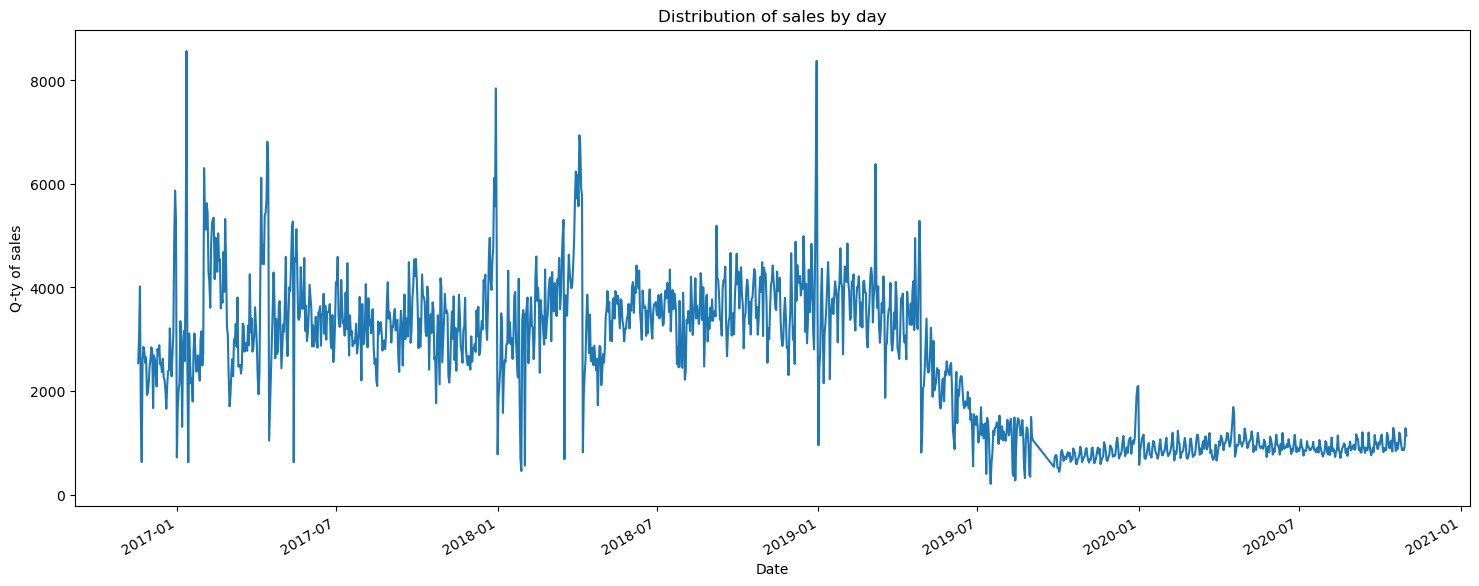

In [77]:
#Distribution of sales by day
plt.figure(figsize=(18, 7))
df.groupby('date')['sales_quantity'].sum().plot(title='Distribution of sales by day')
plt.xlabel('Date')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by day: Visualization shows that the number of sales has a significant variability, which may be due to seasonality or other factors. Also , we have a significant drop in sales_quantity

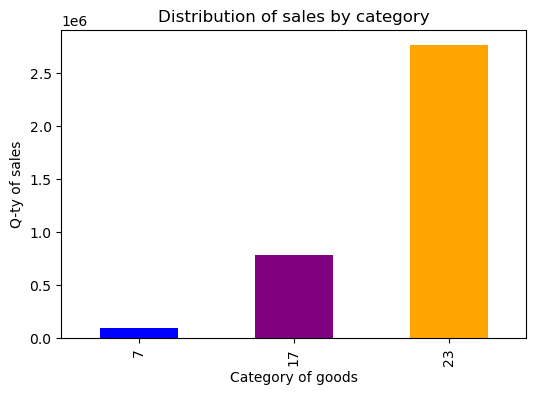

In [78]:
#Distribution of sales by category 
plt.figure(figsize=(6, 4))
colors = ['blue', 'purple', 'orange']
df.groupby('category_id')['sales_quantity'].sum().plot(kind='bar', color=colors, title='Distribution of sales by category')
plt.xlabel('Category of goods')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by category: Visualization shows that the category "23" has a significant q-ty compared to "7" and "17"

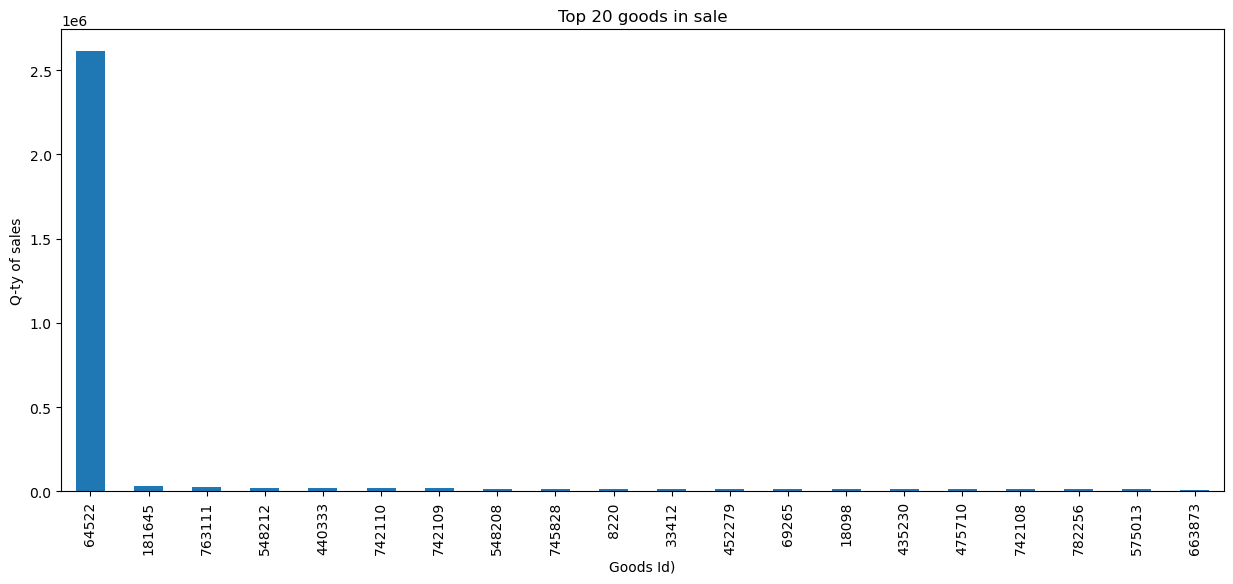

In [79]:
# Distribution of sales by product. We will use SKU.
plt.figure(figsize=(15, 6))
top_sku_sales = df.groupby('sku_id')['sales_quantity'].sum().sort_values(ascending=False).head(20)
top_sku_sales.plot(kind='bar', title='Top 20 goods in sale')
plt.xlabel('Goods Id)')
plt.ylabel('Q-ty of sales')
plt.show()

* Distribution of sales by product: SKUs_id 64522 has the highest q-ty of sales

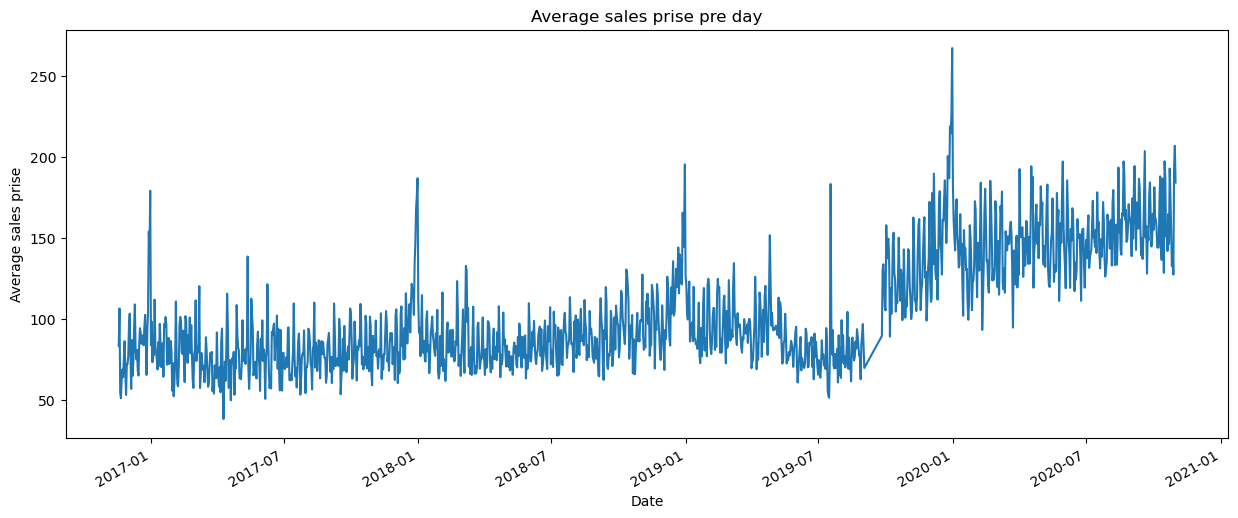

In [80]:
#Analysis of price median
plt.figure(figsize=(15, 6))
df.groupby('date')['sales_price'].mean().plot(title='Average sales prise pre day')
plt.xlabel('Date')
plt.ylabel('Average sales prise')
plt.show()

* Average sale price per day: We can notice some growing of sales from 01-2020

#### Look like after the growing in sales price from 01-2020 we have a significant sales drop in q-ty

# Feature Engineering

In [81]:
#Create day indicators for week, month, year, day and day off
df['day_of_week'] = df['date'].dt.dayofweek
#Days Indicator (0 - weekday, 1 - day off)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['day_of_month'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['week_of_year'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.year

#check
df.head()

,date,category_id,sku_id,sales_price,sales_quantity,day_of_week,is_weekend,day_of_month,month,week_of_year,year
0,2016-11-25,7,1108,457.60,1.0,4,0,25,11,47,2016
1,2016-11-18,7,2999,470.60,1.0,4,0,18,11,46,2016
2,2016-11-18,7,1428,717.60,1.0,4,0,18,11,46,2016
3,2016-11-18,7,3923,383.50,1.0,4,0,18,11,46,2016
4,2016-11-18,17,8075,18.85,2.0,4,0,18,11,46,2016
